In [1]:
using LinearAlgebra, NLsolve, Plots, DataFrames

In [6]:
μ = 0.1

function U(x, y)
    term1 = -(1 - μ) / sqrt((x + μ)^2 + y^2)
    term2 = -μ / sqrt((x - (1 - μ))^2 + y^2)
    term3 = -0.5 * (x^2 + y^2)
    return term1 + term2 + term3
end

x = range(-2, 2, length=400)
y = range(-2, 2, length=400)

-2.0:0.010025062656641603:2.0

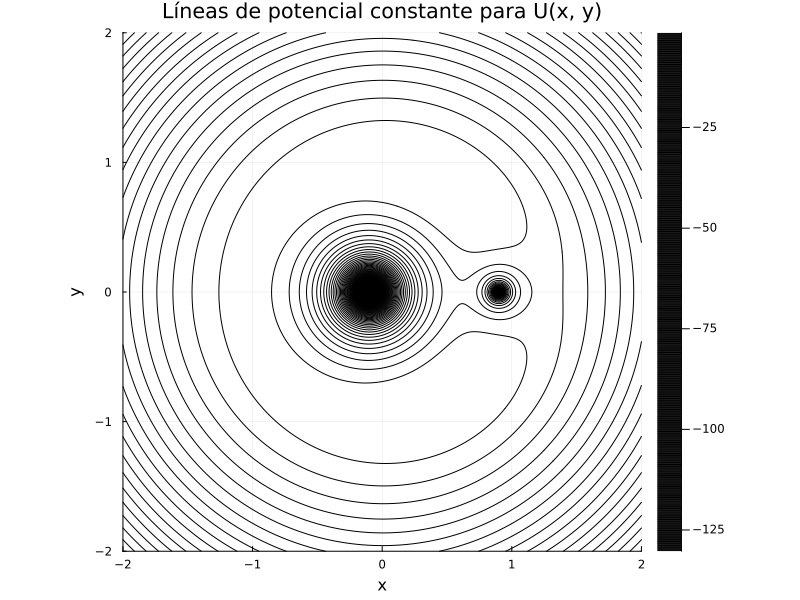

In [7]:
# Calculamos el potencial
Z = [U(xi, yi) for yi in y, xi in x]

contour(x, y, Z, levels=800, color=:black, 
        title="Líneas de potencial constante para U(x, y)",
        xlabel="x", ylabel="y", 
        colorbar=true, 
        aspect_ratio=:equal,
        size=(800, 600),
        xlims=(-2, 2),
        ylims=(-2, 2))

In [2]:
μvals = 0.001:0.001:0.5
nμvals = length(μvals)

# Inicializamos una matriz para almacenar las posiciones 
p_lagrange = zeros(Float64, nμvals, 10)

# Definimos la función que calcula los puntos 
function evalF!(F, X, μ)
    x, y = X
    #x
    F[1] = x - (1 - μ)*(x + μ)/((x + μ)^2 + y^2)^(3/2) - μ*(x + μ - 1)/((x + μ - 1)^2 + y^2)^(3/2)
    #y
    F[2] = y - (1 - μ)*y/((x + μ)^2 + y^2)^(3/2) - μ*y/((x + μ - 1)^2 + y^2)^(3/2)
end

# Definimos posiciones iniciales
initial_positions = [
    [0.0, 0.0],
    [1.0, 0.0],
    [-1.0, 0.0],
    [0.0, 1.0],
    [0.0, -1.0]
]

# Iteramos sobre cada valor de μ
for (i, μ) in enumerate(μvals)
    # Para cada μ, encuentra los cinco puntos de Lagrange
    for (j, pos) in enumerate(initial_positions)
        # Usamos NLsolve para encontrar la solución, comenzando desde la posición inicial
        result = nlsolve((F, X) -> evalF!(F, X, μ), pos, autodiff=:forward)
        # Guarda la solución (punto de Lagrange) en la matriz p_lagrange
        p_lagrange[i, (2j-1):(2j)] = result.zero
    end
end

In [7]:
p_lagrange

500×10 Matrix{Float64}:
 0.931287    0.0  1.06992  0.0  …  0.499  0.866025  0.499  -0.866025
 0.913219    0.0  1.08786  0.0     0.498  0.866025  0.498  -0.866025
 0.900374    0.0  1.10029  0.0     0.497  0.866025  0.497  -0.866025
 0.890018    0.0  1.11005  0.0     0.496  0.866025  0.496  -0.866025
 0.881168    0.0  1.11819  0.0     0.495  0.866025  0.495  -0.866025
 0.873344    0.0  1.12522  0.0  …  0.494  0.866025  0.494  -0.866025
 0.86627     0.0  1.13144  0.0     0.493  0.866025  0.493  -0.866025
 0.859774    0.0  1.13702  0.0     0.492  0.866025  0.492  -0.866025
 0.853738    0.0  1.1421   0.0     0.491  0.866025  0.491  -0.866025
 0.848079    0.0  1.14677  0.0     0.49   0.866026  0.49   -0.866026
 ⋮                              ⋱                          
 0.0112943   0.0  1.20117  0.0     0.008  0.866025  0.008  -0.866025
 0.0098825   0.0  1.20082  0.0     0.007  0.866025  0.007  -0.866025
 0.00847068  0.0  1.20048  0.0     0.006  0.866025  0.006  -0.866025
 0.00705888  0.0  1

In [3]:
# Definimos las funciones teóricas para comparación
theoretical_approximations = [
    μ -> 1 - ∛(μ/3),
    μ -> 0,
    μ -> 1 + ∛(μ/3),
    μ -> 0,
    μ -> -1 - 5μ/12,
    μ -> 0,
    μ -> 1/2 - μ,
    μ -> √3/2,
    μ -> 1/2 - μ,
    μ -> -√3/2
]

# Crear una matriz para almacenar los errores
errors = zeros(Float64, length(μvals), 10)

# errores absolutos entre numéricos y teóricos
for idx in 1:10
    errors[:, idx] = abs.(p_lagrange[:, idx] .- [theoretical_approximations[idx](μ) for μ in μvals])
end


df = DataFrame(μ = μvals)

for idx in 1:10
    df[!, "Error L$((idx + 1) ÷ 2) $(idx % 2 == 0 ? "y" : "x")"] = errors[:, idx]
end

In [4]:
df

Row,μ,Error L1 x,Error L1 y,Error L2 x,Error L2 y,Error L3 x,Error L3 y,Error L4 x,Error L4 y,Error L5 x,Error L5 y
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.001,0.000623103,0.0,0.00057997,0.0,5.4412e-11,0.0,4.94101e-8,2.89527e-8,4.94101e-8,2.89527e-8
2,0.002,0.000576578,0.0,0.000506424,0.0,4.35793e-10,0.0,6.54189e-11,5.58684e-11,6.54189e-11,5.58684e-11
3,0.003,0.000373655,0.0,0.000285368,0.0,1.47248e-9,0.0,1.1964e-8,7.58901e-9,1.1964e-8,7.58901e-9
4,0.004,8.24719e-5,0.0,1.72654e-5,0.0,3.49434e-9,0.0,1.469e-8,8.68501e-9,1.469e-8,8.68501e-9
5,0.005,0.000268551,0.0,0.000374254,0.0,6.83275e-9,0.0,4.54081e-12,1.60894e-12,4.54081e-12,1.60894e-12
6,0.006,0.000664079,0.0,0.000771035,0.0,1.18206e-8,0.0,5.85254e-13,2.69118e-13,5.85254e-13,2.69118e-13
7,0.007,0.00109464,0.0,0.00119868,0.0,1.87924e-8,0.0,9.82381e-13,1.84852e-13,9.82381e-13,1.84852e-13
8,0.008,0.00155384,0.0,0.00165121,0.0,2.80842e-8,0.0,1.0645e-7,5.64615e-8,1.0645e-7,5.64615e-8
9,0.009,0.00203714,0.0,0.0021244,0.0,4.00335e-8,0.0,6.01963e-13,8.894e-13,6.01963e-13,8.894e-13


In [12]:
nuevo_μ = 1/81

0.012345679012345678

In [13]:
nuevo = zeros(Float64, 10)

for (j, pos) in enumerate(initial_positions)
    result = nlsolve((F, X) -> evalF!(F, X, nuevo_μ), pos, autodiff=:forward)
    nuevo[(2j-1):(2j)] = result.zero
end

println(" nuevo μ = $nuevo_μ: $(nuevo)")

 nuevo μ = 0.012345679012345678: [0.8359594242088261, 0.0, 1.156427769486874, 0.0, -1.0051439291835182, 0.0, 0.48765432098768785, 0.8660254037888647, 0.48765432098768785, -0.8660254037888647]


In [20]:
plot(title="Puntos de Lagrange vs μ", xlabel="μ", ylabel="Posición")
for i in 1:5
    plot!(μvals, p_lagrange[:, 2i-1], label="L$i x")
    plot!(μvals, p_lagrange[:, 2i], label="L$i y", linestyle=:dash)
end

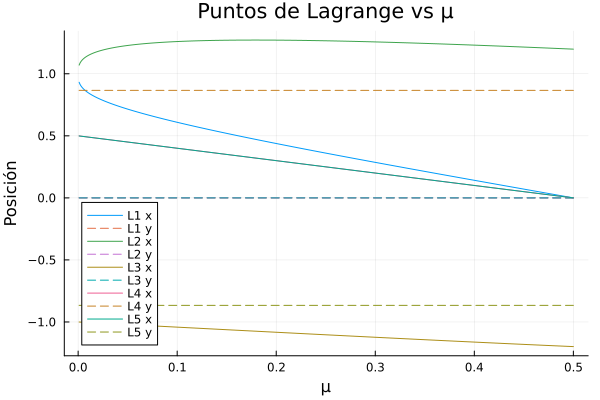

In [21]:
plot!()

In [24]:
function plot_lagrange_points(μ_index)
    μ = μvals[μ_index]
    scatter(title="Puntos de Lagrange para μ = $μ",
           xlabel="x", ylabel="y", aspect_ratio=:equal)
    # Plotear los cuerpos primarios
    scatter!([-μ, 1-μ], [0, 0], label="Cuerpos primarios", color=:black)
    # Plotear los puntos de Lagrange
    for i in 1:5
        scatter!([p_lagrange[μ_index, 2i-1]], [p_lagrange[μ_index, 2i]], 
                label="L$i", markersize=6)
    end
end

# Visualizar para un valor específico de μ (por ejemplo, el índice 100)
plot_lagrange_points(100)

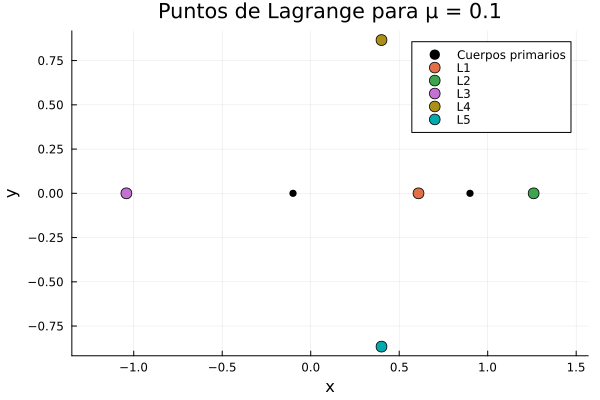

In [25]:
plot!()

In [26]:
# Heatmap de errores
heatmap(log10.(errors),
        title="Errores en los Puntos de Lagrange",
        xlabel="Componente",
        ylabel="μ",
        yticks=(1:100:length(μvals), string.(μvals[1:100:end])),
        xticks=(1:10, ["L$(i÷2+1) $(i%2==1 ? "x" : "y")" for i in 1:10]),
        colorbar_title="log₁₀(Error)",
        right_margin=5mm)

UndefVarError: UndefVarError: `mm` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing Measures in the current active module Main

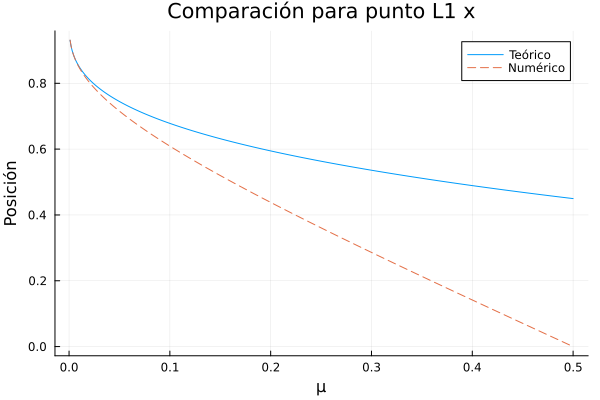

In [27]:
# Comparación de resultados numéricos vs teóricos para un punto específico
function plot_comparison(point_index)
    theoretical = [theoretical_approximations[point_index](μ) for μ in μvals]
    numerical = p_lagrange[:, point_index]
    
    plot(title="Comparación para punto L$(point_index÷2 + 1) $(point_index%2==0 ? "y" : "x")",
         xlabel="μ", ylabel="Posición")
    plot!(μvals, theoretical, label="Teórico")
    plot!(μvals, numerical, label="Numérico", linestyle=:dash)
end

# Por ejemplo, para L1x:
plot_comparison(1)

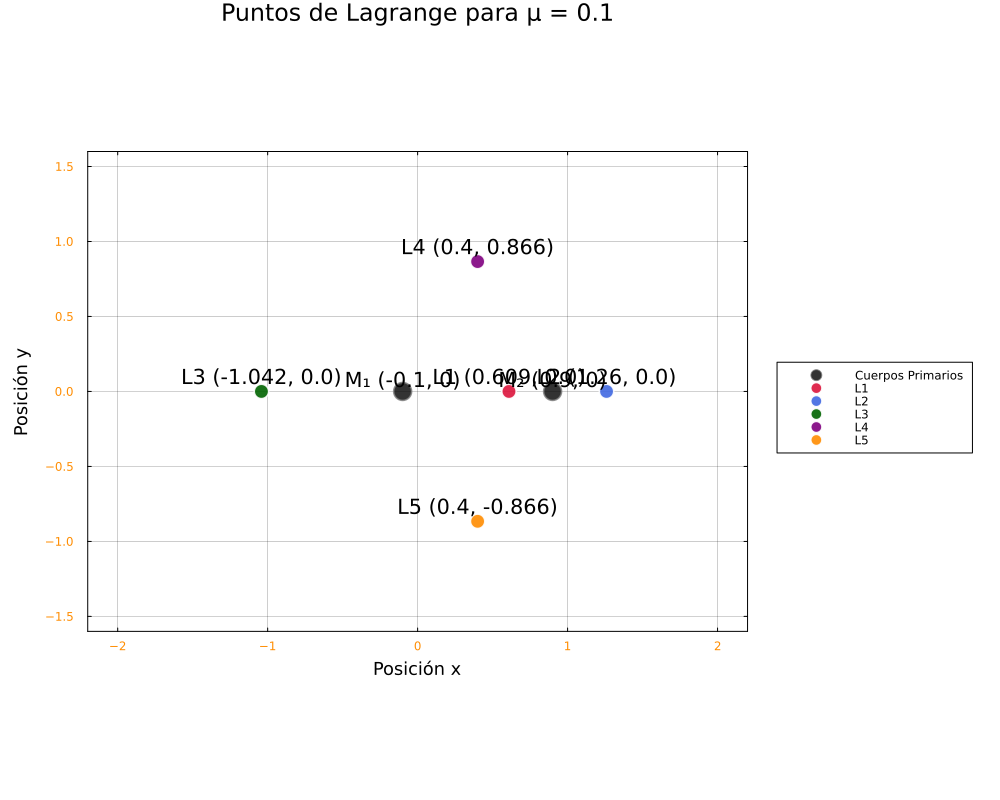

In [64]:
using Plots

function plot_lagrange_points(μ_index)
    μ = μvals[μ_index]
    
    # Crear el plot base con tema moderno
    theme(:default)
    
    p = scatter(
        title="Puntos de Lagrange para μ = $μ",
        xlabel="Posición x",
        ylabel="Posición y",
        aspect_ratio=:equal,
        legend=:outerright,
        size=(1000, 800),
        grid=true,
        gridalpha=0.2,
        framestyle=:box,
        background_color=:white,
        foreground_color=:black,
        xlabelfontsize=12,
        ylabelfontsize=12,
        titlefontsize=16,
        margin=5Plots.mm
    )
    
    # Mejorar la visualización de los cuerpos primarios
    scatter!([-μ, 1-μ], [0, 0], 
        label="Cuerpos Primarios",
        color=:black,
        markersize=10,
        markerstrokewidth=1,
        markerstrokecolor=:gray,
        markeralpha=0.8
    )
    
    # Anotaciones más claras para los cuerpos primarios
    annotate!([-μ, 1-μ], [0.08, 0.08], 
        ["M₁ (-$(round(μ, digits=3)), 0)", "M₂ ($(round(1-μ, digits=3)), 0)"],
        fontsize=3
    )
    
    # Paleta de colores moderna y armoniosa
    colors = [:crimson, :royalblue, :darkgreen, :purple, :darkorange]
    
    # Mejorar la visualización de los puntos de Lagrange
    for i in 1:5
        x = p_lagrange[μ_index, 2i-1]
        y = p_lagrange[μ_index, 2i]
        
        # Puntos de Lagrange con mejor diseño
        scatter!([x], [y],
            label="L$i",
            color=colors[i],
            markersize=8,
            markerstrokewidth=1,
            markerstrokecolor=:white,
            markeralpha=0.9
        )
        
        # Anotaciones más legibles
        annotate!(x, y + 0.1,
            "L$i ($(round(x, digits=3)), $(round(y, digits=3)))",
            fontsize=9,
            textcolor=colors[i]
        )
    end
    
    # Ajustar límites con más espacio para las anotaciones
    xlims!(-2.2, 2.2)
    ylims!(-1.6, 1.6)
    
    # Añadir un subtítulo informativo
    plot!(title=["Puntos de Lagrange para μ = $μ" "Sistema de Tres Cuerpos Restringido"],
          titlelocation=:center,
          titlefontsize=[16 12])
    
    return p
end

# Visualizar para un valor específico de μ
μ_index = findfirst(x -> x ≈ 0.1, μvals)
plot_lagrange_points(μ_index)

In [65]:


# Asegúrate de tener definidos μvals y p_lagrange antes de ejecutar esta función
# Ejemplo:
# μvals = [0.1, 0.2, 0.3]  # Valores de μ
# p_lagrange = [ ... ]      # Coordenadas de los puntos de Lagrange para cada μ

function plot_lagrange_points(μ_index)
    μ = μvals[μ_index]
    
    # Aplicar un tema moderno
    theme(:plotly)
    
    p = scatter(
        title = "Puntos de Lagrange para μ = $μ",
        xlabel = "Posición x",
        ylabel = "Posición y",
        aspect_ratio = :equal,
        legend = :outerright,
        size = (1000, 800),
        grid = true,
        gridalpha = 0.3,
        framestyle = :box,
        background_color = :white,
        foreground_color = :black,
        xlabelfontsize = 12,
        ylabelfontsize = 12,
        titlefontsize = 18,
        margin = 5Plots.mm,
        fontfamily = "Arial"
    )
    
    # Visualización de los cuerpos primarios
    scatter!([-μ, 1-μ], [0, 0],
        label = "Cuerpos Primarios",
        color = [:black, :gray],
        markershape = [:circle, :circle],
        markersize = 12,
        markerstrokewidth = 1.5,
        markerstrokecolor = :black,
        markeralpha = 0.9
    )
    
    # Anotaciones de los cuerpos primarios
    annotate!([-μ, 1-μ], [0.1, 0.1],
        ["M₁ (-$(round(μ, digits=3)), 0)", "M₂ ($(round(1-μ, digits=3)), 0)"],
        fontsize = 10,
        textcolor = :black,
        halign = :center
    )
    
    # Paleta de colores moderna y armoniosa para Lagrange
    colors = [:crimson, :royalblue, :darkgreen, :purple, :darkorange]
    
    # Visualización de los puntos de Lagrange
    for i in 1:5
        x = p_lagrange[μ_index, 2i-1]
        y = p_lagrange[μ_index, 2i]
        
        scatter!([x], [y],
            label = "L$i",
            color = colors[i],
            markersize = 10,
            markerstrokewidth = 1,
            markerstrokecolor = :white,
            markeralpha = 0.95
        )
        
        # Anotaciones más pequeñas para Lagrange
        annotate!(x, y + 0.1,
            "L$i ($(round(x, digits=3)), $(round(y, digits=3)))",
            fontsize = 8,
            textcolor = colors[i],
            halign = :center
        )
    end
    
    # Ajustar límites con más espacio para las anotaciones
    xlims!(-2.5, 2.5)
    ylims!(-2, 2)
    
    # Añadir un subtítulo informativo
    plot!(title = ["Puntos de Lagrange para μ = $μ" "Sistema de Tres Cuerpos Restringido"],
          titlelocation = :top,
          titlefontsize = [18, 14],
          titlefont = "Arial")
    
    return p
end

# Ejemplo de uso:
# Definir μvals y p_lagrange antes de llamar a la función
μvals = [0.1, 0.2, 0.3]  # Ejemplo de valores de μ

# Supongamos que p_lagrange es una matriz donde cada fila corresponde a un μ y contiene las coordenadas de L1 a L5
# Cada punto de Lagrange tiene dos coordenadas (x, y), así que hay 10 columnas (2 para cada L)
# Aquí un ejemplo con valores ficticios
p_lagrange = [
    # L1, L2, L3, L4, L5 para μ = 0.1
    1.2 0.0 -1.2 0.0 0.5 0.866 -0.5 0.866 -0.5 -0.866;
    # L1, L2, L3, L4, L5 para μ = 0.2
    1.1 0.0 -1.1 0.0 0.4 0.866 -0.4 0.866 -0.4 -0.866;
    # L1, L2, L3, L4, L5 para μ = 0.3
    1.0 0.0 -1.0 0.0 0.3 0.866 -0.3 0.866 -0.3 -0.866
]

# Seleccionar un valor específico de μ
μ_index = findfirst(x -> x ≈ 0.1, μvals)

# Generar el plot
plot_lagrange_points(μ_index)


┌ Warning: :plotly is not a known theme, using :default
└ @ Plots /home/marco/.julia/packages/Plots/kLeqV/src/themes.jl:10


In [66]:
plot!()

In [62]:
scalefontsizes(.2)